In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv, det
from tqdm.notebook import tqdm
import random
from scipy.stats import multivariate_normal
import scipy

*I used histogram at the beginning because I misunderstood that we are not supposed to know that $\tilde{p}$ exactly is. 😧

(array([982., 916., 779., 707., 674., 572., 506., 473., 399., 377., 370.,
        337., 260., 232., 263., 191., 178., 181., 131., 149., 110., 111.,
         99., 109.,  81.,  69.,  78.,  65.,  51.,  62.,  45.,  38.,  51.,
         27.,  31.,  30.,  31.,  17.,  26.,  19.,  13.,  18.,  14.,  10.,
         14.,   8.,   8.,  10.,   8.,   8.,   4.,   2.,   4.,   4.,   6.,
          2.,   4.,   2.,   3.,   2.,   4.,   1.,   0.,   6.,   1.,   2.,
          1.,   1.,   1.,   2.,   0.,   2.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([1.41462843e-04, 1.01441932e-01, 2.02742402e-01, 3.04042872e-01,
        4.05343341e-01, 5.06643811e-01, 6.07944280e-01, 7.09244750e-01,
        8.10545219e-01, 9.11845689e-01, 1.01314616e+00, 1.11444663e+00,
        1.21574710e+00, 1.31704757e+00, 1.41834804e+00, 1.51964851e+00,
        1.62094898e+00, 1.72224945e+00, 1.82354991e+00, 1.92485038e+

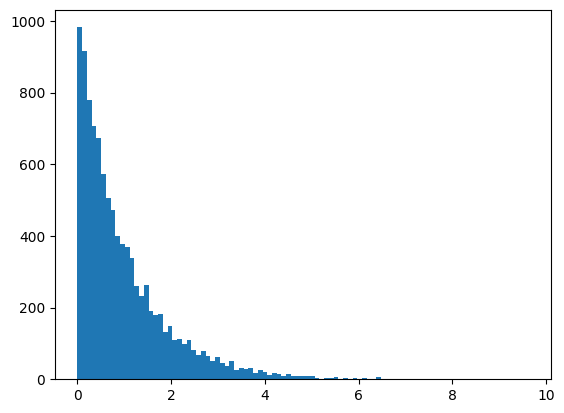

In [ ]:
def SampleExponentialDistribution(lambda_, shape):
  return - 1 / lambda_ * np.log(1 - np.random.uniform(size=shape))

samples = SampleExponentialDistribution(1, (10000, ))
plt.hist(samples, bins='auto')

In [ ]:
def CauchyDistributionPDF(x):
  return 1 / np.pi * 1 / (1 + x**2)

def SampleCauchyDistribution(shape):
  return np.tan(np.pi * (np.random.uniform(size=shape) - 1/2))

x = np.linspace(-5, 5, 1000)
plt.plot(x, CauchyDistributionPDF(x))
samples = SampleCauchyDistribution((1000, ))
plt.hist(samples, bins='auto')

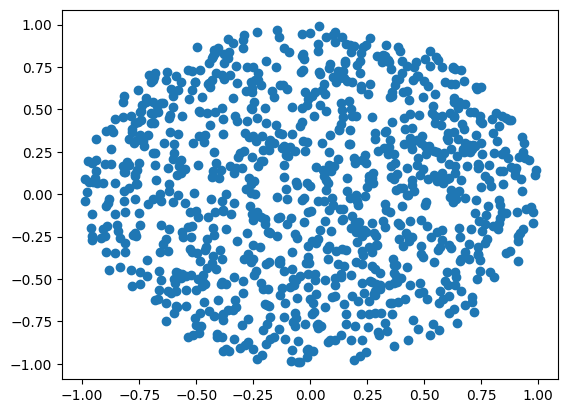

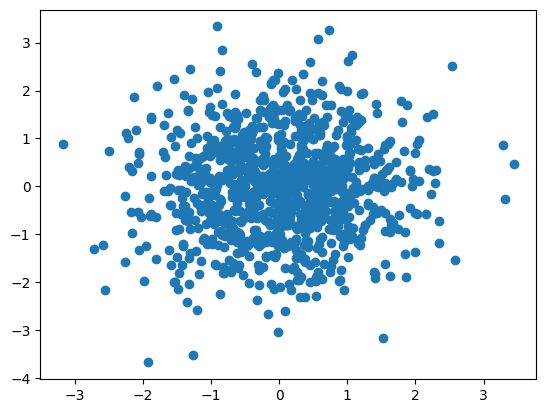

In [ ]:
def SampleCircle():
  z1, z2 = 2 * np.random.uniform() - 1, 2 * np.random.uniform() - 1
  if (z1**2 + z2**2 > 1):
    return SampleCircle()
  return z1, z2

z1 = []
z2 = []
for i in range(1000):
  zz1, zz2 = SampleCircle()
  z1.append(zz1)
  z2.append(zz2)
plt.figure(1)
plt.scatter(z1, z2)


def SampleGaussian(n):
  z1 = []
  z2 = []
  for i in range(n):
    zz1, zz2 = SampleCircle()
    z1.append(zz1)
    z2.append(zz2)

  r = (np.array(z1)**2 + np.array(z2)**2) ** 0.5
  return np.array(z1) * (-2.0 * np.log(r**2) / r**2) ** 0.5, np.array(z2) * (-2.0 * np.log(r**2) / r**2) ** 0.5
y1, y2 = SampleGaussian(1000)
plt.figure(2)
plt.scatter(y1, y2)


#**Rejection sampling**

gamma distribution

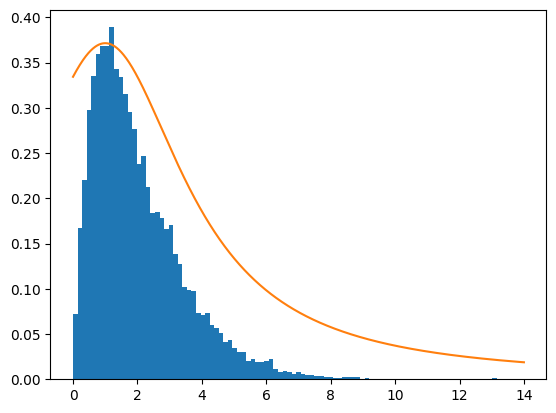

In [ ]:
samples = np.random.gamma(2, 1, size=(10000, )) # target
plt.hist(samples, bins=np.linspace(0, 14, 100), density=True)

x = np.linspace(0, 14, 1000)
pdf = scipy.stats.cauchy.pdf(x, loc=1, scale=3)
k = 3.5
plt.plot(x, k * pdf)

In [ ]:
# I used a histogram to store p(z0)
hist_values, bin_edges = np.histogram(samples, bins=np.linspace(0, 14, 100), density=True)

def SampleGammaDistribution():
  z0 = scipy.stats.cauchy.rvs(1, 3)
  if (z0 < 0):
    return SampleGammaDistribution()

  kq = k * scipy.stats.cauchy.pdf(z0, 1, 3)
  u0 = np.random.uniform(0, kq)

  interval_indices = z0 * 100 // 14 # Map to the corresponding histogram probability
  if (interval_indices >= len(hist_values)):
    return SampleGammaDistribution()
  p = hist_values[int(interval_indices)]

  if u0 <= p:
    return z0
  else:
    return SampleGammaDistribution()

(array([0.07142143, 0.17183571, 0.23335714, 0.31114286, 0.34579286,
        0.35993571, 0.38468571, 0.35922857, 0.34862143, 0.30407143,
        0.34155   , 0.32316429, 0.3069    , 0.24820714, 0.24113571,
        0.25174286, 0.22275   , 0.18385714, 0.1782    , 0.17112857,
        0.16688571, 0.1782    , 0.14284286, 0.13082143, 0.11597143,
        0.099     , 0.08344286, 0.07425   , 0.07778571, 0.07283571,
        0.05727857, 0.05869286, 0.05869286, 0.04242857, 0.04596429,
        0.02828571, 0.02687143, 0.02404286, 0.02192143, 0.0198    ,
        0.01697143, 0.02050714, 0.02757857, 0.02333571, 0.01202143,
        0.0099    , 0.00636429, 0.00848571, 0.00565714, 0.00495   ,
        0.00636429, 0.00636429, 0.00777857, 0.00353571, 0.00353571,
        0.00282857, 0.00141429, 0.00070714, 0.00141429, 0.00212143,
        0.00141429, 0.00212143, 0.        , 0.00070714, 0.00070714,
        0.        , 0.00070714, 0.        , 0.        , 0.00070714,
        0.        , 0.        , 0.        , 0.  

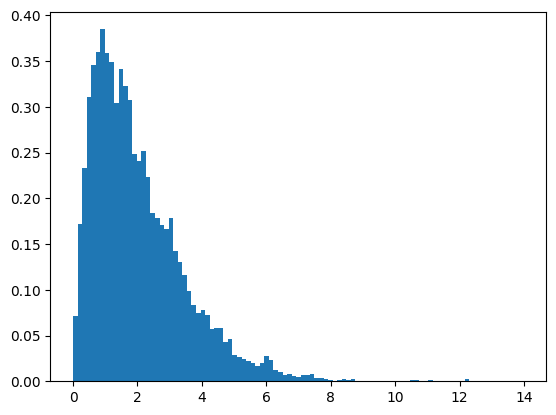

In [ ]:
mysamples = []
for i in range(0, 10000):
  mysamples.append(SampleGammaDistribution())

plt.hist(mysamples, bins=np.linspace(0, 14, 100), density=True)

#**Importance Sampling**

[-3.78738596  0.51274399  1.09029564 ... -0.21092506 -1.2327886
 -1.44777203]


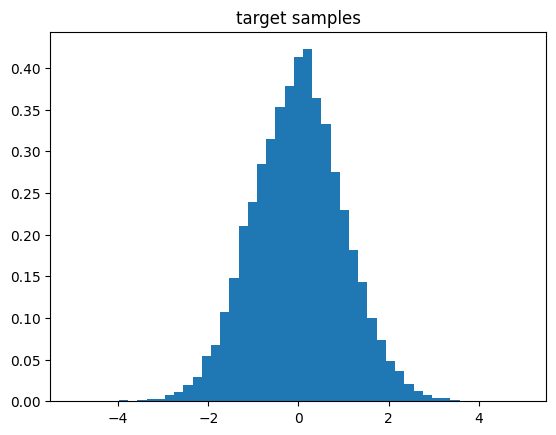

In [ ]:
target_distribution = np.random.normal
proposal_distribution = np.random.uniform
low = -5
high = 5

samples = np.random.normal(0, 1, size=(10000, ))
plt.figure(1)
plt.hist(samples, bins=np.linspace(-5, 5, 50), density=True)
plt.title("target samples")
print(samples)

Text(0.5, 1.0, 'my samples')

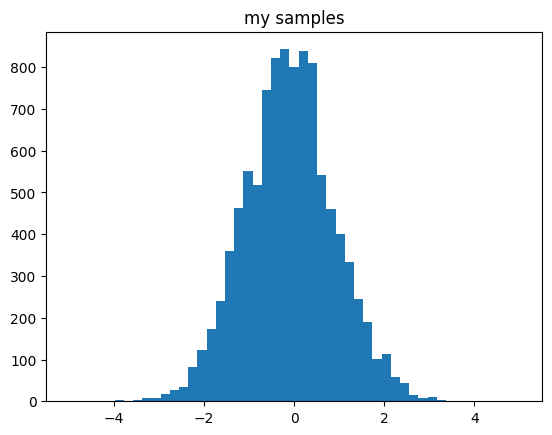

In [ ]:
hist_values, bin_edges = np.histogram(samples, bins=np.linspace(-5, 5, 50), density=True)

def SampleGaussianDistribution(n):
  z = np.random.uniform(low, high, n)
  interval_indices = (z+5) * 50 // 10 # Map to the corresponding histogram probability
  for i in range(0, len(interval_indices)): # if z=5, then interval indice would be 50
    if (interval_indices[i] >= len(hist_values)):
      interval_indices[i] = len(hist_values) - 1

  p_tilde = np.array([hist_values[int(interval_indice)] for interval_indice in interval_indices])
  q = scipy.stats.uniform.pdf(z, low, high-low)
  w = p_tilde / q / (p_tilde / q).sum()
  return np.random.choice(z, n, p=w)

mysamples = SampleGaussianDistribution(10000)
plt.hist(mysamples, bins=np.linspace(-5, 5, 50))
plt.title("my samples")

#**Metropolis Algorithm**

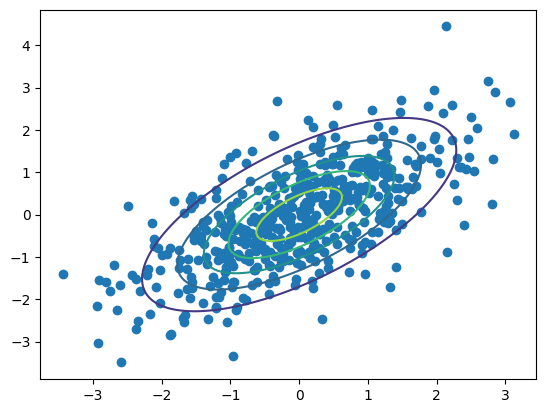

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from numpy.random import seed, rand

def plot_distribution(mean, cov):
  x, y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
  xy = np.column_stack([x.ravel(), y.ravel()])
  mvn = multivariate_normal(mean, cov)
  z = mvn.pdf(xy).reshape(x.shape)
  plt.contour(x, y, z, levels=5, cmap='viridis')


S = np.array([[1.5, 1], [1, 1.5]]).T
mu = np.array([0, 0])

samples = np.random.multivariate_normal(mu, S, 500)
plt.scatter(samples[:, 0], samples[:, 1])
plot_distribution(mu, S)


0.8467874794069192


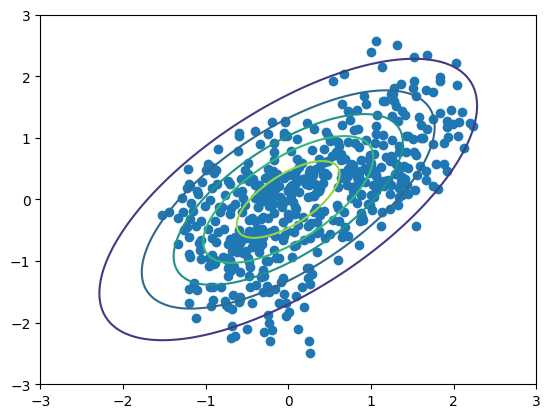

In [ ]:
c = 0.1
z = samples.mean(axis=0)

my_samples = []
nrounds = 0
nsamples = 514
while len(my_samples) < nsamples:
  nrounds += 1
  q = multivariate_normal(z, cov=[[0.1, 0], [0, 0.1]])   # suppose q(z*|z) = N(z, 0.1)
  z_star = q.rvs()

  p_z_star = multivariate_normal.pdf(z_star, mu, S)
  p_z = multivariate_normal.pdf(z, mu, S)
  A = min(1, p_z_star / p_z)
  if A > rand():
    my_samples.append(z_star)
    z = z_star
my_samples = np.c_[my_samples]
plt.scatter(my_samples[:, 0], my_samples[:, 1])
plot_distribution(mu, S)

proportion_accepted = nsamples / nrounds
print(proportion_accepted)

#**Metropolis-Hastings Algorithm**

0.8426229508196721


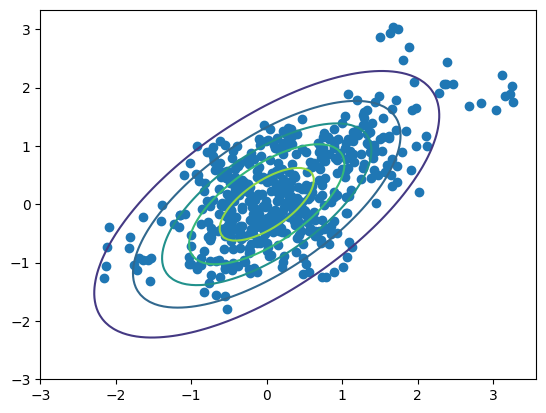

In [ ]:
c = 0.1
z = samples.mean(axis=0)

my_samples = []
nrounds = 0
nsamples = 514
while len(my_samples) < nsamples:
  nrounds += 1
  q = multivariate_normal(z, cov=[[0.1, 0], [0, 0.1]])   # suppose q(z*|z) = N(z, 0.1)
  z_star = q.rvs()

  p_z_star = multivariate_normal.pdf(z_star, mu, S)
  p_z = multivariate_normal.pdf(z, mu, S)
  q_z_star = multivariate_normal.pdf(z_star, z, [[0.1, 0], [0, 0.1]])
  q_z = multivariate_normal.pdf(z, z_star, [[0.1, 0], [0, 0.1]])  # q is symmetric here so there's no difference

  A = min(1, p_z_star * q_z / p_z / q_z_star)
  if A > rand():
    my_samples.append(z_star)
    z = z_star
my_samples = np.c_[my_samples]
plt.scatter(my_samples[:, 0], my_samples[:, 1])
plot_distribution(mu, S)

proportion_accepted = nsamples / nrounds
print(proportion_accepted)

#**Gibbs Sampling**

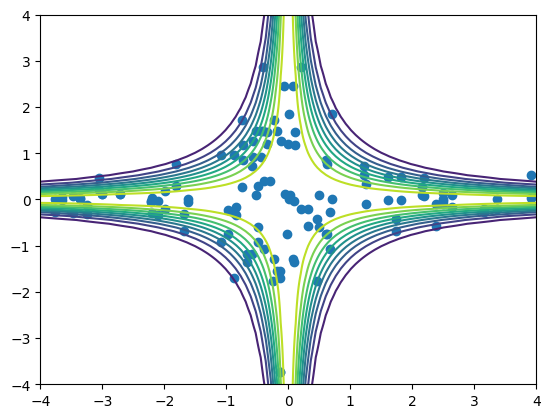

In [ ]:
def p(z, y):
    return np.exp(-z ** 2 * y ** 2)

def plotDistribution():
  x, y = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
  xy = np.column_stack([x.ravel(), y.ravel()])
  z = p(x, y).reshape(x.shape)
  plt.contour(x, y, z, levels=10, cmap='viridis')
plotDistribution()

x, y = 0.01, 0.01
samples = [(x, y)]

# generate samples
for _ in range(1000):
    sigma_x = np.sqrt(1 / (2 * y ** 2))
    x = np.random.normal(0, sigma_x)
    samples.append([x, y])

    sigma_y = np.sqrt(1 / (2 * x ** 2))
    y = np.random.normal(0, sigma_y)
    samples.append([x, y])

samples = np.r_[samples]
plt.scatter(samples[:, 0], samples[:, 1])
plt.ylim(-4, 4)
plt.xlim(-4, 4);

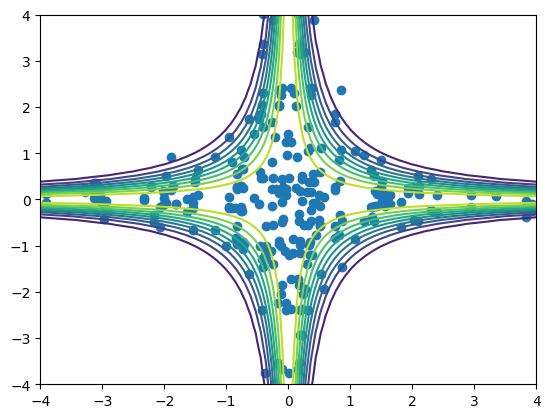

In [ ]:
# The conditional transformation is given by 11.50
# Gibbs sampling uses a special transform so that there's no need to reject samples.
# z_k refers to the kth dimension of z
x, y = -1, -1
samples = [(x, y)]

seed(31)
alpha = 0.5
for _ in range(500):
    sigma_x = np.sqrt(1 / (2 * y ** 2))
    x = np.random.normal(0, sigma_x)
    x = alpha * x + sigma_x * np.sqrt(1 - alpha ** 2) * np.random.normal(0, 1)
    samples.append([x, y])

    sigma_y = np.sqrt(1 / (2 * x ** 2))
    y = np.random.normal(0, sigma_y)
    y = alpha * y + sigma_y * np.sqrt(1 - alpha ** 2) * np.random.normal(0, 1)
    samples.append([x, y])

my_samples = np.r_[samples]
plt.scatter(my_samples[:, 0], my_samples[:, 1])
plt.ylim(-4, 4)
plt.xlim(-4, 4)

plotDistribution()

#**Slice Sampling**

Note that we've never used something to control step size in the previous codes because it is implicily determined by the proposal distribution (like the variance in gaussian distribution).

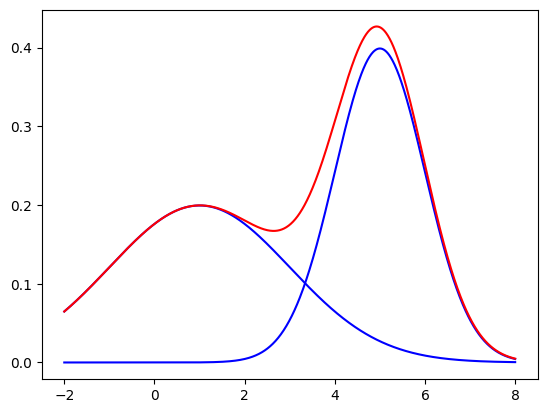

In [ ]:
mu = [1, 5]
var = [2, 1]

x = np.linspace(-2, 8, 1000)

prob0 = scipy.stats.norm.pdf(x, mu[0], var[0])
prob1 = scipy.stats.norm.pdf(x, mu[1], var[1])
pdf = prob0 + prob1
plt.plot(x, prob0, c='b')
plt.plot(x, prob1, c='b')
plt.plot(x, pdf, c='r')

Text(0.5, 1.0, 'my samples')

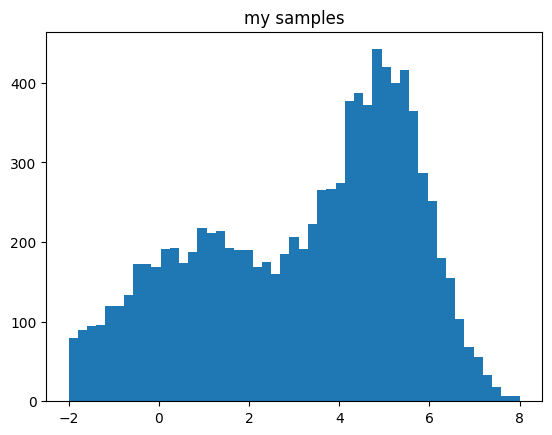

In [ ]:
def getProb(x):
  return 1 * scipy.stats.norm.pdf(x, mu[0], var[0]) + 1 * scipy.stats.norm.pdf(x, mu[1], var[1])

# Suppose we can do that easily
def getSample():
  x = np.random.uniform()
  if x < 0.5:
    return np.random.normal(mu[0], var[0])
  else:
    return np.random.normal(mu[1], var[1])

Zp = 2

def SampleGaussianMixture():
  z = getSample()
  p_z = getProb(z)
  u = np.random.uniform(0, p_z)

  left = z-1
  right = z+1
  increment = 0.1
  # increment endpoints
  while u < getProb(left):
    left -= increment
  while u < getProb(right):
    right += increment

  # modify endpoints
  sample = None
  while sample == None or getProb(sample) < u:
    sample = np.random.uniform(left, right)
    if (sample < z):
      left = sample
    else:
      right = sample
  return sample

mySamples = []
for i in range(0, 10000):
  mySamples.append(SampleGaussianMixture())


plt.hist(mySamples, bins=np.linspace(-2, 8, 50))
plt.title("my samples")


#**The Hybrid Monte Carlo Algorithm**

Step 0: Initialize z, r, and $\epsilon$

Step 1: Use leapfrog to update z and r using their gradient (11.58) (11.59)

Step 2: Accept z with probability

$$min (1, exp\{H(z, r) - H(z^*, r^*)\})$$

Step 3: As suggested at the end of (p550), we replace the value of r with one drawn from its distribution conditioned on z (I used uniform for simplicity).

Text(0.5, 1.0, 'Target distribution')

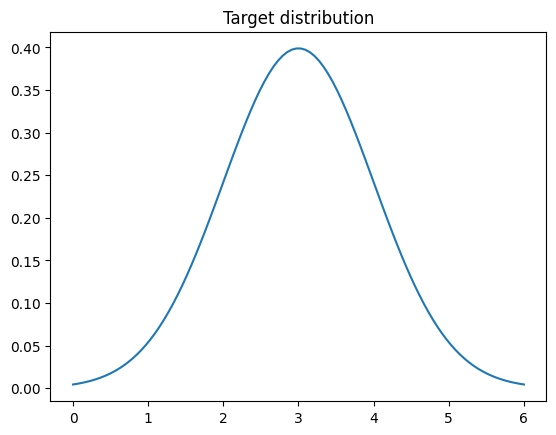

In [ ]:
mu = 3
sigma = 1
x = np.linspace(0, 6, 100)
pdf = scipy.stats.norm.pdf(x, mu, sigma)
plt.xlim(0, 6)
plt.plot(x, pdf)
plt.title("Target distribution")

Text(0.5, 1.0, 'my samples')

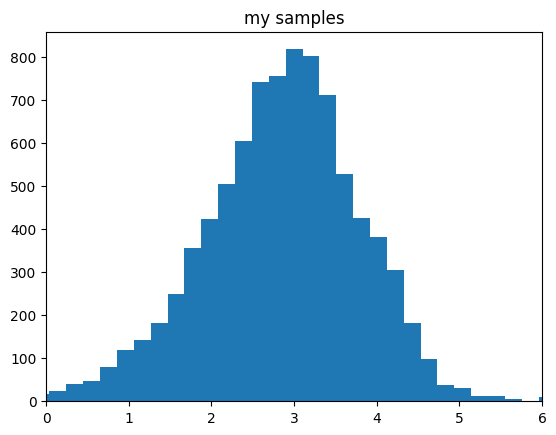

In [ ]:
z = 2
r = 1
epsilon = 0.001

def calcH(z, r):
  return 1/2 * (z-mu)**2 / sigma**2 + 1/2 * r**2

def dE(z):
  return -(z-mu) / sigma**2

def leapfrog(z, r):
  steps = [[z, r]]
  for _ in range(200):
    r_e2 = r - epsilon / 2 * dE(z)
    z = z + epsilon * r_e2
    r = r_e2 - epsilon / 2 * dE(z)
    steps.append([z, r])
  steps = np.array(steps)
  return steps

mySamples = []
for i in range(0, 10000):
  steps = leapfrog(z, r)
  z, r = steps[0]
  z_star, r_star = steps[-1]
  H = calcH(z, r)
  H_star = calcH(z_star, r_star)
  criterion = min(1, np.exp(H - H_star))
  u = np.random.rand()
  if u < criterion:
    mySamples.append(z)
    z = z_star
  r = np.random.randn()

plt.xlim(0, 6)
plt.hist(mySamples, bins=np.linspace(-2, 8, 50))
plt.title("my samples")